<a href="https://githubtocolab.com/fuszti/advent_of_code_2022/blob/main/day_05/AoC_2022_Day_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

<details>
<summary>What is this notebook?</summary>
The [Advent of Code](https://adventofcode.com/2022) is an advent calendar with programming tasks. You have to solve 2 algorithmic problems on each day. I challenge myself to solve them by data scientist tools. So you will see pandas, numpy, torch or datatable tricks here. The tasks are not data scientist tasks, so you can find easier or faster solutions. Perhaps you sometimes find my solutions too artificial. But I try to use the data scientist tool as meaningful way as I can.

In [my repository](https://github.com/fuszti/advent_of_code_2022) you find the input.txt file for each day. You can upload that to here, so you can run the code on big input.
</details>

In [1]:
#@title Creating example small input file { display-mode: "form" }
small_input_text = \
"""    [D]    
[N] [C]    
[Z] [M] [P]
 1   2   3 

move 1 from 2 to 1
move 3 from 1 to 3
move 2 from 2 to 1
move 1 from 1 to 2"""
with open("small_input.txt", "w") as small_file:
    small_file.write(small_input_text)

# Task 1
Source: https://adventofcode.com/2022/day/5
<details>
  <summary>Show me the description of the task 1</summary>
--- Day 5: Supply Stacks ---
The expedition can depart as soon as the final supplies have been unloaded from the ships. Supplies are stored in stacks of marked crates, but because the needed supplies are buried under many other crates, the crates need to be rearranged.

The ship has a giant cargo crane capable of moving crates between stacks. To ensure none of the crates get crushed or fall over, the crane operator will rearrange them in a series of carefully-planned steps. After the crates are rearranged, the desired crates will be at the top of each stack.

The Elves don't want to interrupt the crane operator during this delicate procedure, but they forgot to ask her which crate will end up where, and they want to be ready to unload them as soon as possible so they can embark.

They do, however, have a drawing of the starting stacks of crates and the rearrangement procedure (your puzzle input). For example:

    [D]    
[N] [C]    
[Z] [M] [P]
 1   2   3 

move 1 from 2 to 1
move 3 from 1 to 3
move 2 from 2 to 1
move 1 from 1 to 2
In this example, there are three stacks of crates. Stack 1 contains two crates: crate Z is on the bottom, and crate N is on top. Stack 2 contains three crates; from bottom to top, they are crates M, C, and D. Finally, stack 3 contains a single crate, P.

Then, the rearrangement procedure is given. In each step of the procedure, a quantity of crates is moved from one stack to a different stack. In the first step of the above rearrangement procedure, one crate is moved from stack 2 to stack 1, resulting in this configuration:

[D]        
[N] [C]    
[Z] [M] [P]
 1   2   3 
In the second step, three crates are moved from stack 1 to stack 3. Crates are moved one at a time, so the first crate to be moved (D) ends up below the second and third crates:

        [Z]
        [N]
    [C] [D]
    [M] [P]
 1   2   3
Then, both crates are moved from stack 2 to stack 1. Again, because crates are moved one at a time, crate C ends up below crate M:

        [Z]
        [N]
[M]     [D]
[C]     [P]
 1   2   3
Finally, one crate is moved from stack 1 to stack 2:

        [Z]
        [N]
        [D]
[C] [M] [P]
 1   2   3
The Elves just need to know which crate will end up on top of each stack; in this example, the top crates are C in stack 1, M in stack 2, and Z in stack 3, so you should combine these together and give the Elves the message CMZ.

After the rearrangement procedure completes, what crate ends up on top of each stack?
</details>

In [24]:
from dataclasses import dataclass
from matplotlib import pyplot as plt

In [50]:
@dataclass
class Command:
    count: int
    from_stack: int
    to_stack: int

CHAR_IDX_TO_STACK_IDX = dict([(4*i + 1, i) for i in range(10)])

def solve_task_1(input_file_name):
    stacks, commands = read_stacks_and_commands(input_file_name)
    for command in commands:
        for _ in range(command.count):
            stacks[command.to_stack].append(stacks[command.from_stack].pop())
    plot_stacks(stacks)

def read_stacks_and_commands(input_file_name):
    commands = []
    stacks = []
    for _ in range(10):
        stacks.append([])
    reading_stacks = True
    with open(input_file_name, "r") as input_file:
        for line in input_file:
            line = line.rstrip()
            if len(line) == 0 or line[1] == "1":
                reading_stacks = False
                continue
            if reading_stacks:
                update_stacks(stacks, line)
            else:
                commands.append(convert_to_command(line))
    [s.reverse() for s in stacks]
    return stacks, commands

def plot_stacks(stacks):
    fig, ax = plt.subplots()
    for i, stack in enumerate(stacks):
        ax.bar(i, len(stack))
    for i, stack in enumerate(stacks):
        if stack:
            ax.text(i, len(stack), stack[-1], ha='center',
                    weight='bold')
    ax.legend()

def update_stacks(stacks, line):
    for char_idx in CHAR_IDX_TO_STACK_IDX:
        if char_idx < len(line) and line[char_idx] != " ":
            stacks[CHAR_IDX_TO_STACK_IDX[char_idx]].append(line[char_idx])

def convert_to_command(line):
    line = line[5:]
    count_str, other = line.split(" from ")
    from_str, to_str = other.split(" to ")
    return Command(int(count_str), int(from_str) - 1, int(to_str) - 1)
    

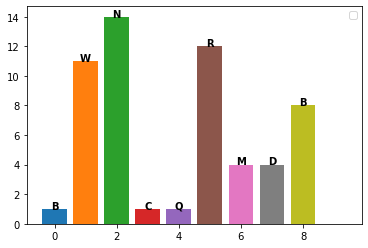

In [51]:
input_file_name = "small_input.txt"
solve_task_1(input_file_name)

## Key tricks
How to put text on a barplot.

# Task 2

Source: https://adventofcode.com/2022/day/5
<details>
  <summary>Show me the description of the task 2</summary>
  
--- Part Two ---
As you watch the crane operator expertly rearrange the crates, you notice the process isn't following your prediction.

Some mud was covering the writing on the side of the crane, and you quickly wipe it away. The crane isn't a CrateMover 9000 - it's a CrateMover 9001.

The CrateMover 9001 is notable for many new and exciting features: air conditioning, leather seats, an extra cup holder, and the ability to pick up and move multiple crates at once.

Again considering the example above, the crates begin in the same configuration:

    [D]    
[N] [C]    
[Z] [M] [P]
 1   2   3 
Moving a single crate from stack 2 to stack 1 behaves the same as before:

[D]        
[N] [C]    
[Z] [M] [P]
 1   2   3 
However, the action of moving three crates from stack 1 to stack 3 means that those three moved crates stay in the same order, resulting in this new configuration:

        [D]
        [N]
    [C] [Z]
    [M] [P]
 1   2   3
Next, as both crates are moved from stack 2 to stack 1, they retain their order as well:

        [D]
        [N]
[C]     [Z]
[M]     [P]
 1   2   3
Finally, a single crate is still moved from stack 1 to stack 2, but now it's crate C that gets moved:

        [D]
        [N]
        [Z]
[M] [C] [P]
 1   2   3
In this example, the CrateMover 9001 has put the crates in a totally different order: MCD.

Before the rearrangement process finishes, update your simulation so that the Elves know where they should stand to be ready to unload the final supplies. After the rearrangement procedure completes, what crate ends up on top of each stack?
</details>

In [61]:
def solve_task_2(input_file_name):
    stacks, commands = read_stacks_and_commands(input_file_name)
    for command in commands:
        moving = stacks[command.from_stack][-command.count:]
        stacks[command.from_stack] = stacks[command.from_stack][:-command.count]
        stacks[command.to_stack].extend(moving)
    plot_stacks(stacks)

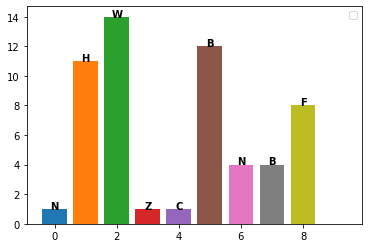

In [62]:
input_file_name = "small_input.txt"
solve_task_2(input_file_name)

## Key tricks
Same